In [16]:
# costStretch between finger1 and finger2
def funcCostFinger(pos0, pos1, plot=False):
    finger0 = pos0[2]
    finger1 = pos1[2]
    fret0 = pos0[1]
    fret1 = pos1[1]
    sign = -1 if finger0 > finger1 else 1

    deltaFret = fret1 - fret0
    absDeltaFinger = abs(finger0-finger1)

    if (finger0 == 0 or finger1 == 0):
        # costStretch = 0.5
        print("It should not enter this condition, funcCostFinger or funcCalCostAlong should be wrong")
        costStretch = GlobalVar.get_costBetwFret0andOther()
    elif (finger0 == finger1):
        print("It should not enter this condition, funcCostFinger or funcCalCostAlong should be wrong")
        costStretch = GlobalVar.get_costBetwFret0andOther()
    else:
        #  ********** PWL parameter ***********
        # pwl = [[-1,1,2], [5, 0.5, 2]]
        pwl = [[-1,absDeltaFinger,absDeltaFinger+1], [5, 0.5, 2]]
        pwl = [[-10, -1,absDeltaFinger,absDeltaFinger+1, 10], [10, 5, 0.5, 2, 5]]
        pwl = np.array(pwl)
        pwl[0,:] = pwl[0,:]*sign
        pwl = pwl[:,pwl[0,:].argsort()] # sorting by x value

        costStretch = np.interp(deltaFret, pwl[0,:], pwl[1,:], left=pwl[1,0], right=pwl[1,-1])


    if plot:
        x = np.linspace(-5, 5, 11)
        if (finger0 == 0 or finger1 == 0):
            plt.plot(x, [0.5]*len(x))
        elif finger0 == finger1:
            return costStretch
        else:
            y = np.interp(x, pwl[0,:], pwl[1,:], left=pwl[1,0], right=pwl[1,-1])
            plt.plot(x,y)

        plt.title("Finger" + str(finger0) + " to Finger" + str(finger1))
        plt.xlabel("delta fret")
        plt.ylabel("cost")
        plt.xticks(np.arange(min(x), max(x)+1, 1.0))
        plt.grid(True)
        plt.ylim(0,10)
    return costStretch


# Draw Cost of Stretch Figure
def drawCostStretchFigure():
    pos0 = [3,5,4]
    pos1 = [3,6,1]
    plt.subplots(figsize=(16, 10))
    plt.tight_layout()
    # plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.8,hspace=0.5)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,hspace=0.5)
    for i in range(4):
        for j in range(4):
    #         print((i % 4)*4 + ( j % 4) + 1)
            if i != j:
                plt.subplot(4,4, (i % 4)*4 + ( j % 4) + 1)
                funcCostFinger([3,5, i], [3, 5, j], plot=True)
    fig = plt.gcf()
    plt.figure(figsize=(40,20))
#     fig.savefig('cost_of_stretching_20190808.png', dpi=100)

It should not enter this condition, funcCostFinger or funcCalCostAlong should be wrong
It should not enter this condition, funcCostFinger or funcCalCostAlong should be wrong
It should not enter this condition, funcCostFinger or funcCalCostAlong should be wrong
It should not enter this condition, funcCostFinger or funcCalCostAlong should be wrong
It should not enter this condition, funcCostFinger or funcCalCostAlong should be wrong
It should not enter this condition, funcCostFinger or funcCalCostAlong should be wrong


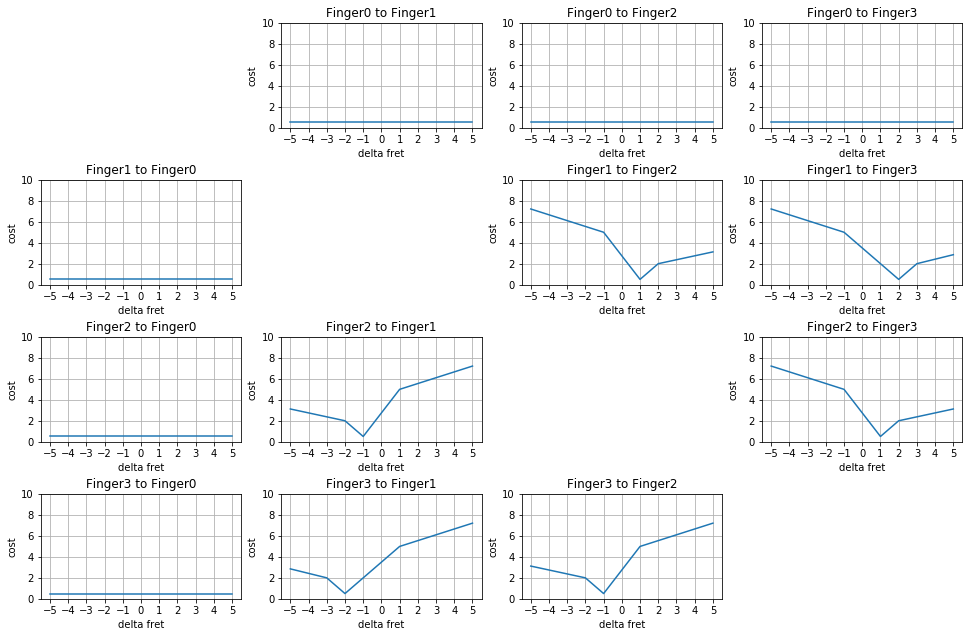

<Figure size 2880x1440 with 0 Axes>

In [17]:
# import matplotlib.pyplot as plt
# import globalvar as GlobalVar
# import numpy as np
drawCostStretchFigure()